In [3]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from gensim.models import LdaSeqModel
import pandas as pd
# import ecopy as ep
import pingouin as pg

In [4]:
nTopics = 45

In [5]:
#45 dtm topics
topic_names = [
'Streamflow',
'Groundwater',
'Wastewater Treatment',
'Ecosystem Studies',
'Hydrobiology',
'Hydrogeology',
'Mass-balance and Transfer',
'Sediment Transport',
'Rainfall-Runoff',
'Stochastic Models',
'Hydrochemistry',
'Microbiology',
'Nutrient and Heavy Metal Removal',
'Systems Hydrology',
'Quantitative Methods',
'Water Treatment',
'Irrigation',  
'Uncertainty',
'Biodegradation',
'Solute Transport',
'Land-Surface Flux',
'Modeling',
'Pollutant Sampling & Monitoring',
'Evaporation & Transpiration',
'Gauging & Monitoring',
'Reservoir Management',
'Pollutant Removal',
'Topography',
'Water Management Solutions',
'Vadose Zone',
'Ecological Modeling',
'Soil Chemistry',
'Water Policy and Planning',
'Surface Water Quality',
'Precipitation',
'Soil and Hydrometeorological Sampling',
'Infiltration',
'Spatial Variability',
'Numerical Modeling',
'Rainfall',
'Sedimentology',
'Groundwater Supply & Demand',
'Aquifers',
'Watershed Features',
'Climate Change Impacts',
]

In [6]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'chamoisee': '#A0785A',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'cadmiumred': '#E30022',
 'royalblue': '#4169E1',
 'americanrose':  '#FF033E',
 'asparagus': '#87A96B',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'cadet':'#536872',
 'navy':'#000080',
 'bondiblue':'#0095B6',
 'blue':'#0000FF',
 'boysenberry':'#873260',
 'khaki':'#F0E68C',
 'cgblue':'#007AA5',
#  'linen':'#FAF0E6',
 'byzantine':'#BD33A4',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
 'darkcyan': '#008B8B',
    
}

# turn into a list
colorlist = []
for i, color in enumerate(custom_colors.values()):
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))
    colorlist[i] = (colorlist[i][0] / 256, colorlist[i][1] / 256, colorlist[i][2] / 256)

# Load Data

In [7]:
# Load model
dtm_model = LdaSeqModel.load('trained_models/dtm_model45')

In [8]:
#load doc-topic distributions
with open('data/dtm_doc_topic_all.pkl', 'rb') as f:
    arr_arr = pkl.load(f)

In [9]:
# Pull topics
topics = dtm_model.print_topics(top_terms=20)
topics

[[('flow', 0.14590894375166233),
  ('discharge', 0.05545372190532527),
  ('stream', 0.053449923776802605),
  ('network', 0.047861178652654414),
  ('channel', 0.04694774274029255),
  ('river', 0.035425793275972915),
  ('drainage', 0.03229600085724704),
  ('basin', 0.014696040458538262),
  ('low', 0.013413750176182695),
  ('reach', 0.011544019801079684),
  ('downstream', 0.010703418907382944),
  ('route', 0.009364384619396962),
  ('slope', 0.008676093776521789),
  ('drain', 0.008519484591163895),
  ('length', 0.008239658485272463),
  ('width', 0.00822197238129336),
  ('path', 0.007881254641285985),
  ('stage', 0.007738251180104735),
  ('outflow', 0.007706304092217646),
  ('bank', 0.007371517020116261)],
 [('water', 0.07658573860505084),
  ('groundwater', 0.046694439209385395),
  ('recharge', 0.025717932329164615),
  ('aquifer', 0.016941020337892937),
  ('area', 0.015533746219469994),
  ('table', 0.01550164408599715),
  ('flow', 0.013452421473313497),
  ('system', 0.012058881718034261),
 

In [10]:
# Load raw corpus dataframe
with open('data/raw_corpus_broad_dtm.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
#sort dataframe by year

corpus_df_dtm = corpus_df.sort_values('Year', axis = 0, ascending = True, inplace=False)
corpus_df_dtm.reset_index(drop=True, inplace=True)

# creating an array of number of documents by year
time_slice_list = []
time_seq = []
for y, year in enumerate(np.unique(corpus_df_dtm['Year'])):
    time_slice_list.append((year,(corpus_df_dtm['Year']==year).value_counts()[1]))
    
time_slice = np.array(time_slice_list)[:,1].astype(np.int)
time_slice = time_slice.tolist()
time_seq = time_slice

/var/folders/y0/kygdp4c13x56469jnrq5w3z80000gn/T/ipykernel_17757/3056709254.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time_slice = np.array(time_slice_list)[:,1].astype(np.int)


In [11]:
# Pull journals
journals = corpus_df.Journal.unique()
journals

array(['WRR', 'AWR', 'WR', 'JCH', 'JH', 'JWRPM', 'GW', 'HSJ', 'HP', 'WRM',
       'HESS', 'JAWRA', 'HGJ', 'JHM', 'WRI', 'ESWRT', 'JHREG', 'ISWCR'],
      dtype=object)

In [12]:
# Pull years
years = np.unique(corpus_df['Year'])

# Corpus Complexity

In [13]:
def calc_entropy(pmf):
    return -np.nansum(pmf * np.log(pmf)) #code implementation of entropy equation

In [14]:
# Count per journal per year
journal_papers = np.full(len(journals), np.nan) #an array of nans with a len(journal)=6
for j, journal in enumerate(journals): #count for all journals
    journal_papers[j] = len(np.where(corpus_df['Journal'] == journal)[0]) #length of array of wherever the journal is true for a year 

In [17]:
# len(topic_dist)

In [18]:
# Create an array of all the doc-topic dist together
topic_dist = []

for y, year in enumerate(years):
    for p in range(time_seq[y]):
        topic_dist.append(arr_arr[y][p])
    
topic_distribution = np.array(topic_dist)

In [19]:
topic_distribution.shape

(74479, 45)

In [20]:
# eqn. 4
# calculate total entropy per journal
journal_entropy = np.full(len(journals), np.nan) 
journal_topic_popularity = np.full([len(journals), nTopics], np.nan) 
for j, journal in enumerate(journals): 
    jidx = np.where(corpus_df.Journal == journal)[0]      
    a = np.sum(topic_distribution[jidx,:], axis=0)
    b = np.sum(topic_distribution[jidx,:])
    journal_topic_popularity[j,:] = a/b  
    journal_entropy[j] = calc_entropy(journal_topic_popularity[j,:])

In [21]:
# # plot total entropy per journal
# fig = plt.figure(figsize=(18, 12.5))
# gs = fig.add_gridspec(1,4)

# sort_dex = np.argsort(-journal_papers)
# plotdata = journal_topic_popularity * np.expand_dims(journal_papers,-1)

# ax1 = fig.add_subplot(gs[0, :3])
# for t in range(nTopics):
#     if t == 0:
#         ax1.bar(journals[sort_dex], plotdata[sort_dex, t],
#                color=colorlist[t])
#     else:
#         ax1.bar(journals[sort_dex], plotdata[sort_dex, t],
#                bottom=np.sum(plotdata[sort_dex, :t], axis=1),
#                color=colorlist[t])

# ax1.set_ylabel('# Papers in Journal', fontsize=14)
# ax1.set_title(f'Journal Topics', fontsize=16)
# ax1.grid()


# ax0 = fig.add_subplot(gs[0, 3])
# for t in range(nTopics):
#     if t == 0:
#         ax0.bar(journals[sort_dex], plotdata[sort_dex, t],
#                color=colorlist[t])
#     else:
#         ax0.bar(journals[sort_dex], plotdata[sort_dex, t],
#                bottom=np.sum(plotdata[sort_dex, :t], axis=1),
#                color=colorlist[t])
# ax0.legend(topic_names)
# ax0.bar(journals[sort_dex], np.sum(plotdata[sort_dex, :], axis=1), color='w')
# ax0.set_xticks([])
# ax0.set_yticks([])

# # Save figure
# plt.savefig('figures/journal_topics_papers_broad.png')

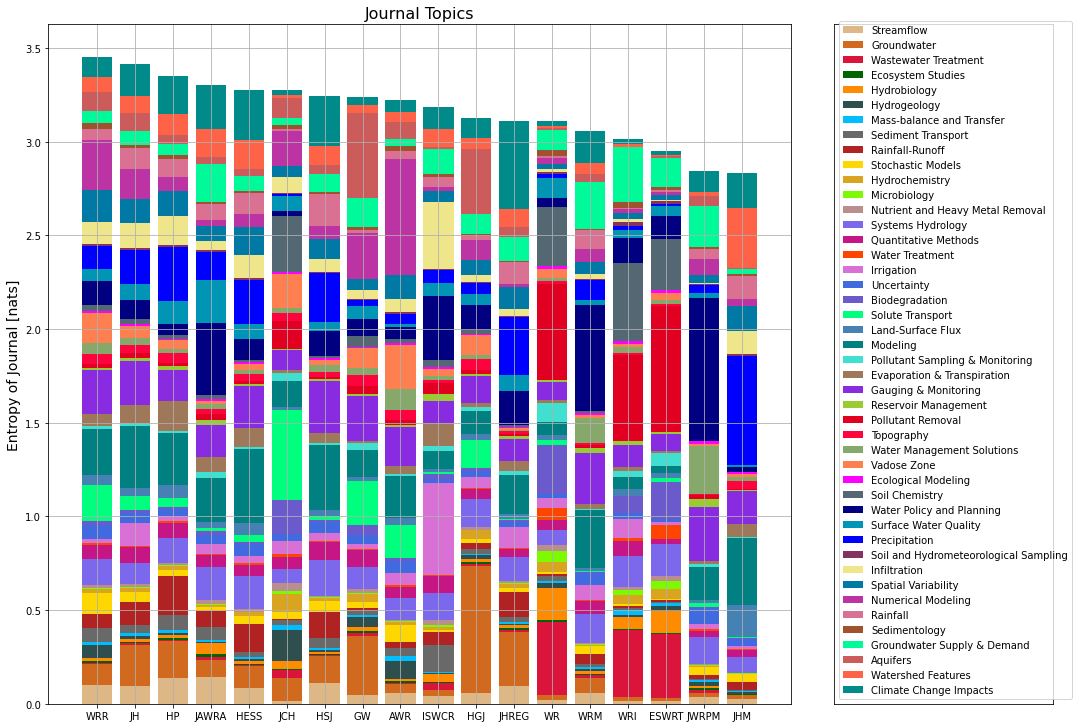

In [22]:
# plot total entropy per journal
fig = plt.figure(figsize=(18, 12.5))
gs = fig.add_gridspec(1,4)

sort_dex = np.argsort(-journal_entropy)
plotdata = journal_topic_popularity * np.expand_dims(journal_entropy,-1)
# plotdata = -journal_topic_popularity * np.log(journal_topic_popularity)

ax1 = fig.add_subplot(gs[0, :3])
for t in range(nTopics):
    if t == 0:
        ax1.bar(journals[sort_dex], plotdata[sort_dex, t],
               color=colorlist[t])
    else:
        ax1.bar(journals[sort_dex], plotdata[sort_dex, t],
               bottom=np.sum(plotdata[sort_dex, :t], axis=1),
               color=colorlist[t])

ax1.set_ylabel('Entropy of Journal [nats]', fontsize=14)
ax1.set_title(f'Journal Topics', fontsize=16)
ax1.grid()


ax0 = fig.add_subplot(gs[0, 3])
for t in range(nTopics):
    if t == 0:
        ax0.bar(journals[sort_dex], plotdata[sort_dex, t],
               color=colorlist[t])
    else:
        ax0.bar(journals[sort_dex], plotdata[sort_dex, t],
               bottom=np.sum(plotdata[sort_dex, :t], axis=1),
               color=colorlist[t])
ax0.legend(topic_names)
ax0.bar(journals[sort_dex], np.sum(plotdata[sort_dex, :], axis=1), color='w')
ax0.set_xticks([])
ax0.set_yticks([])

# Save figure
plt.savefig('figures/journal_topics_entropy_broad.png')

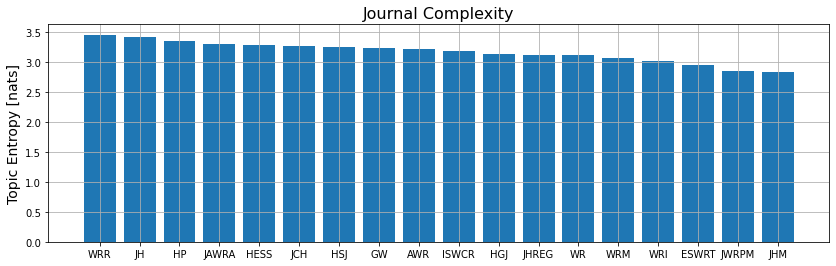

In [23]:
# plot total entropy per journal
fig, ax = plt.subplots(figsize=(14,4))
sort_dex = np.argsort(-journal_entropy)
plt.bar(journals[sort_dex], journal_entropy[sort_dex])
plt.ylabel('Topic Entropy [nats]', fontsize=14)
plt.title(f'Journal Complexity', fontsize=16)
# plt.ylim([2,3])
plt.grid()
plt.savefig('figures/journal_entropy_broad.png')

In [24]:
# calculate entropy of whole corpus
corpus_entropy = np.full(len(years), np.nan)
topic_popularity = np.full([len(years),nTopics], np.nan)

for y, year in enumerate(years):
    topic_distributions_year = topic_distribution[corpus_df['Year'] == year,:]
    topic_popularity[y,:] = np.sum(topic_distributions_year, axis=0) / np.sum(topic_distributions_year)
    corpus_entropy[y] = calc_entropy(topic_popularity[y])

In [25]:
# calculate entropy of individual journals
journal_year_entropy = np.full([len(journals), len(years)], np.nan)
journal_year_topic_popularity = np.full([len(journals), len(years), nTopics], np.nan)
for y, year in enumerate(years):
    for j, journal in enumerate(journals):
        jyidx = np.where(np.logical_and((corpus_df.Journal == journal), (corpus_df.Year == year)))[0]        
        journal_year_topic_popularity[j,y,:] = np.sum(topic_distribution[jyidx,:], axis=0) / np.sum(topic_distribution[jyidx,:]) #per year per topic distribution/ per year all topic distribution
#         journal_year_topic_popularity[j,y,:] = np.where(journal_year_topic_popularity[j,y,:]==0, 1e-9, journal_year_topic_popularity[j,y,:])
        journal_year_entropy[j,y] = calc_entropy(journal_year_topic_popularity[j,y,:])

/var/folders/y0/kygdp4c13x56469jnrq5w3z80000gn/T/ipykernel_17757/3515785048.py:7: RuntimeWarning: invalid value encountered in true_divide
  journal_year_topic_popularity[j,y,:] = np.sum(topic_distribution[jyidx,:], axis=0) / np.sum(topic_distribution[jyidx,:]) #per year per topic distribution/ per year all topic distribution


In [26]:
#replace all nans with a very small value
# journal_year_topic_popularity = np.nan_to_num(journal_year_topic_popularity, copy=True, nan=0.000000001, posinf=None, neginf=None)
#replace all zeros with a very small value
journal_year_topic_popularity = np.where(journal_year_topic_popularity==0, 0.000000001, journal_year_topic_popularity)
journal_year_topic_popularity

array([[[0.02828192, 0.0297579 , 0.002282  , ..., 0.02638671,
         0.01429871, 0.01825826],
        [0.02769706, 0.02991798, 0.00424716, ..., 0.02412833,
         0.01397813, 0.01159002],
        [0.0222029 , 0.02674795, 0.00393701, ..., 0.03145939,
         0.00939819, 0.01491202],
        ...,
        [0.02854383, 0.03198293, 0.00308632, ..., 0.02347712,
         0.02655623, 0.05718825],
        [0.02966192, 0.03233381, 0.00229849, ..., 0.02166363,
         0.04044339, 0.04768228],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.02654589, 0.00558839, 0.00071396, ..., 0.02852224,
         0.00297743, 0.00057983],
        [0.00971747, 0.01666962, 0.00107382, ..., 0.02340403,
         0.00650376, 0.00264779],
        [0.01881347, 0.00469027, 0.00345695, ..., 0.00694647,
         0.0073131 , 0.0204898 ],
        ...,
        [0.02366681, 0.01768739, 0.00373098, ..., 0.02526464,
         0.01046755, 0.02917321],
        [0.0

In [27]:
# journal_year_entropy = np.where(journal_year_entropy=='NaN', 0, journal_year_entropy)
journal_year_entropy[journal_year_entropy == 0] = 'nan'

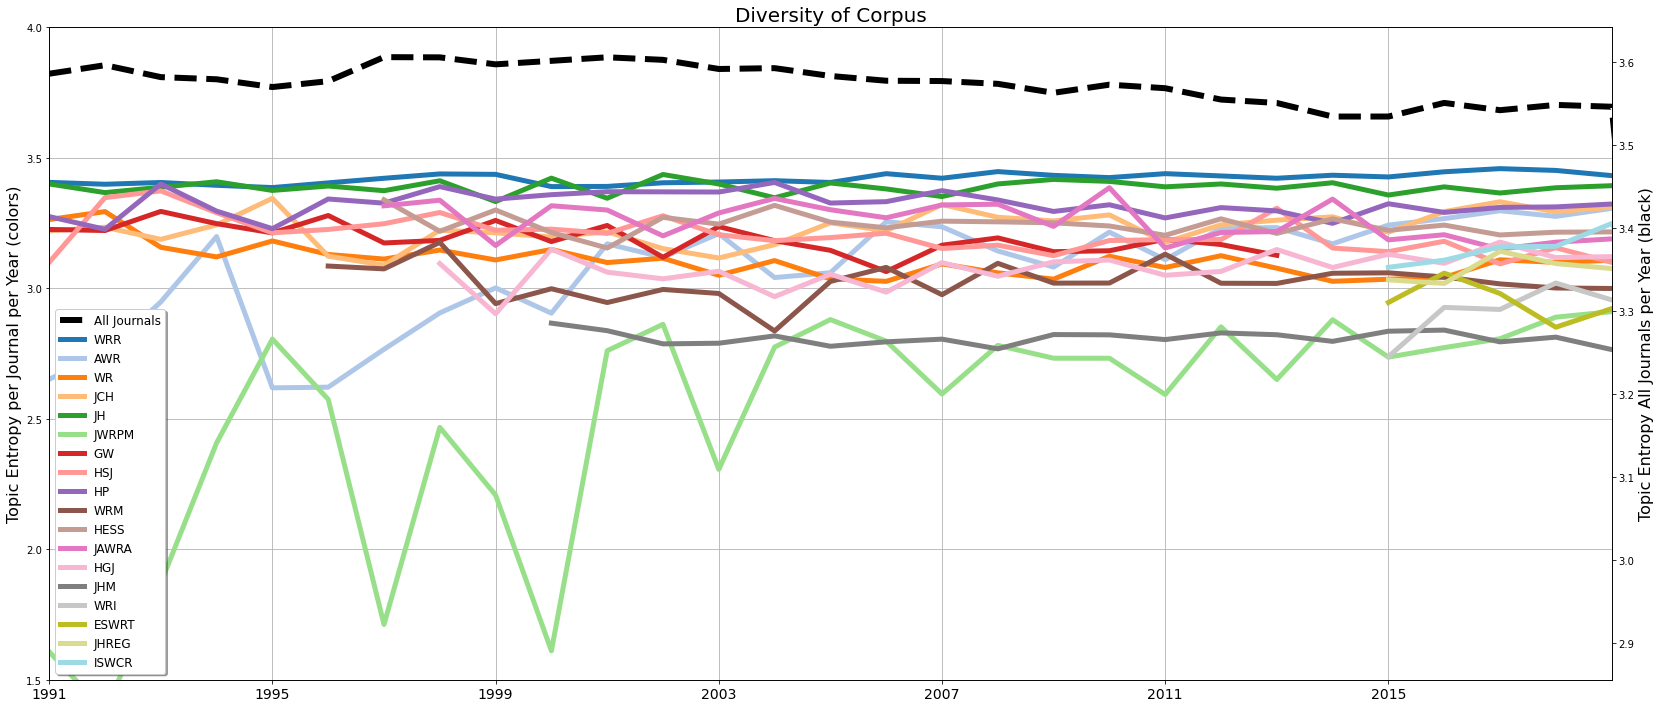

In [28]:
# Create corpus figure --- by year

# Init figures
fig, ax = plt.subplots(figsize=(28,12))

# set color cycle
colordexes = np.linspace(0,19,len(journals)).astype(int)
colors = list(plt.cm.tab20(np.arange(20)))
colors = [colors[i] for i in colordexes]
ax.set_prop_cycle('color', colors)

# Plot full corpus count by year
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
lines = ax2.plot(years, corpus_entropy, 
                 'k--', 
                 label=f'All Journals', 
                 linewidth = 6)  

# Plot each journal individually
for j, journal in enumerate(journals):
    linej = ax.plot(years, journal_year_entropy[j,:], 
                       linewidth = 5,
                       label=f'{journal}')
    lines = lines+linej
    
# Axis labels
ax.set_title(f'Diversity of Corpus', fontsize=20)
ax.set_ylabel('Topic Entropy per Journal per Year (colors)', fontsize=16)
ax2.set_ylabel('Topic Entropy All Journals per Year (black)', fontsize=16)
ax.set_xticks(years[np.floor(np.linspace(0,len(years)-1,8)).astype(int)])
ax.set_xticklabels(years[np.floor(np.linspace(0,len(years)-1,8)).astype(int)], fontsize=14)
ax.set_xlim([0,years[-2]])
ax.set_ylim([1.5,4])

# Legend
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, fontsize=12, shadow=True, loc=3)

# Aesthetics    
ax.grid()

# Save figure
plt.savefig('figures/corpus_entropy_broad.png')

In [29]:
#Calculate corpus diversity
# j = 15
# print(journals[j])
print('Corpus Entropy')
pg.corr((range(0,len(years),1)),corpus_entropy)

Corpus Entropy


,n,r,CI95%,p-val,BF10,power
pearson,30,-0.433973,"[-0.69, -0.09]",0.016573,3.513,0.687791


In [30]:
for j, journal in enumerate(journals):
    
    trend_df = pg.corr((range(0,len(years),1)), journal_year_entropy[j,:])
    print(journal,',', trend_df['r'][0],',',trend_df['p-val'][0],',',trend_df['BF10'][0])

WRR , 0.7135863924026417 , 1.3882783859684376e-05 , 1824.369
AWR , 0.7943626911303138 , 2.6822646688120644e-07 , 6.586e+04
WR , -0.6426776047114032 , 0.00017031078975244783 , 191.811
JCH , 0.46211861699263146 , 0.01160886668265058 , 4.798
JH , -0.0023796645620147976 , 0.9902252172837978 , 0.231
JWRPM , 0.6877909873385536 , 3.742773005478256e-05 , 745.966
GW , -0.6402085394899659 , 0.0010005244276052913 , 41.934
HSJ , -0.5875808968819234 , 0.0008038608606225771 , 48.406
HP , -0.09974196915986352 , 0.606701889483598 , 0.262
WRM , 0.00664416634555183 , 0.9754192841640263 , 0.253
HESS , -0.34910005411423917 , 0.10253226680080026 , 0.909
JAWRA , -0.47812272103879105 , 0.021019736641887936 , 3.175
HGJ , 0.5259720499844027 , 0.01192726648201811 , 5.144
JHM , -0.1357294489332443 , 0.5682929895080796 , 0.322
WRI , 0.7955607555843798 , 0.10749601399535776 , 1.546
ESWRT , -0.5282825487579188 , 0.3601177515968884 , 0.768
JHREG , 0.518840855232487 , 0.3703598822636862 , 0.757
ISWCR , -0.23232137167

In [87]:
#Understanding ecopy diversity
# A site *x* species matrix, where sites are rows and columns are species.
#test calculation of yearwise diversity
ep.diversity(journal_year_topic_popularity[:,8,:], method = 'simpson', breakNA=False, num_equiv=False)
# num_equiv: [True | False]
#                 Whether or not species diversity is returned in number-equivalents, which has better properties than raw diversity.
# Number equivalents are calculated as follows:

#                 *shannon*: :math:`exp(H)`

#                 *gini-simpson*: :math:`\frac{1}{1-D}`

#                 *simpson*: :math:`\frac{1}{D}`


NameError: name 'ep' is not defined

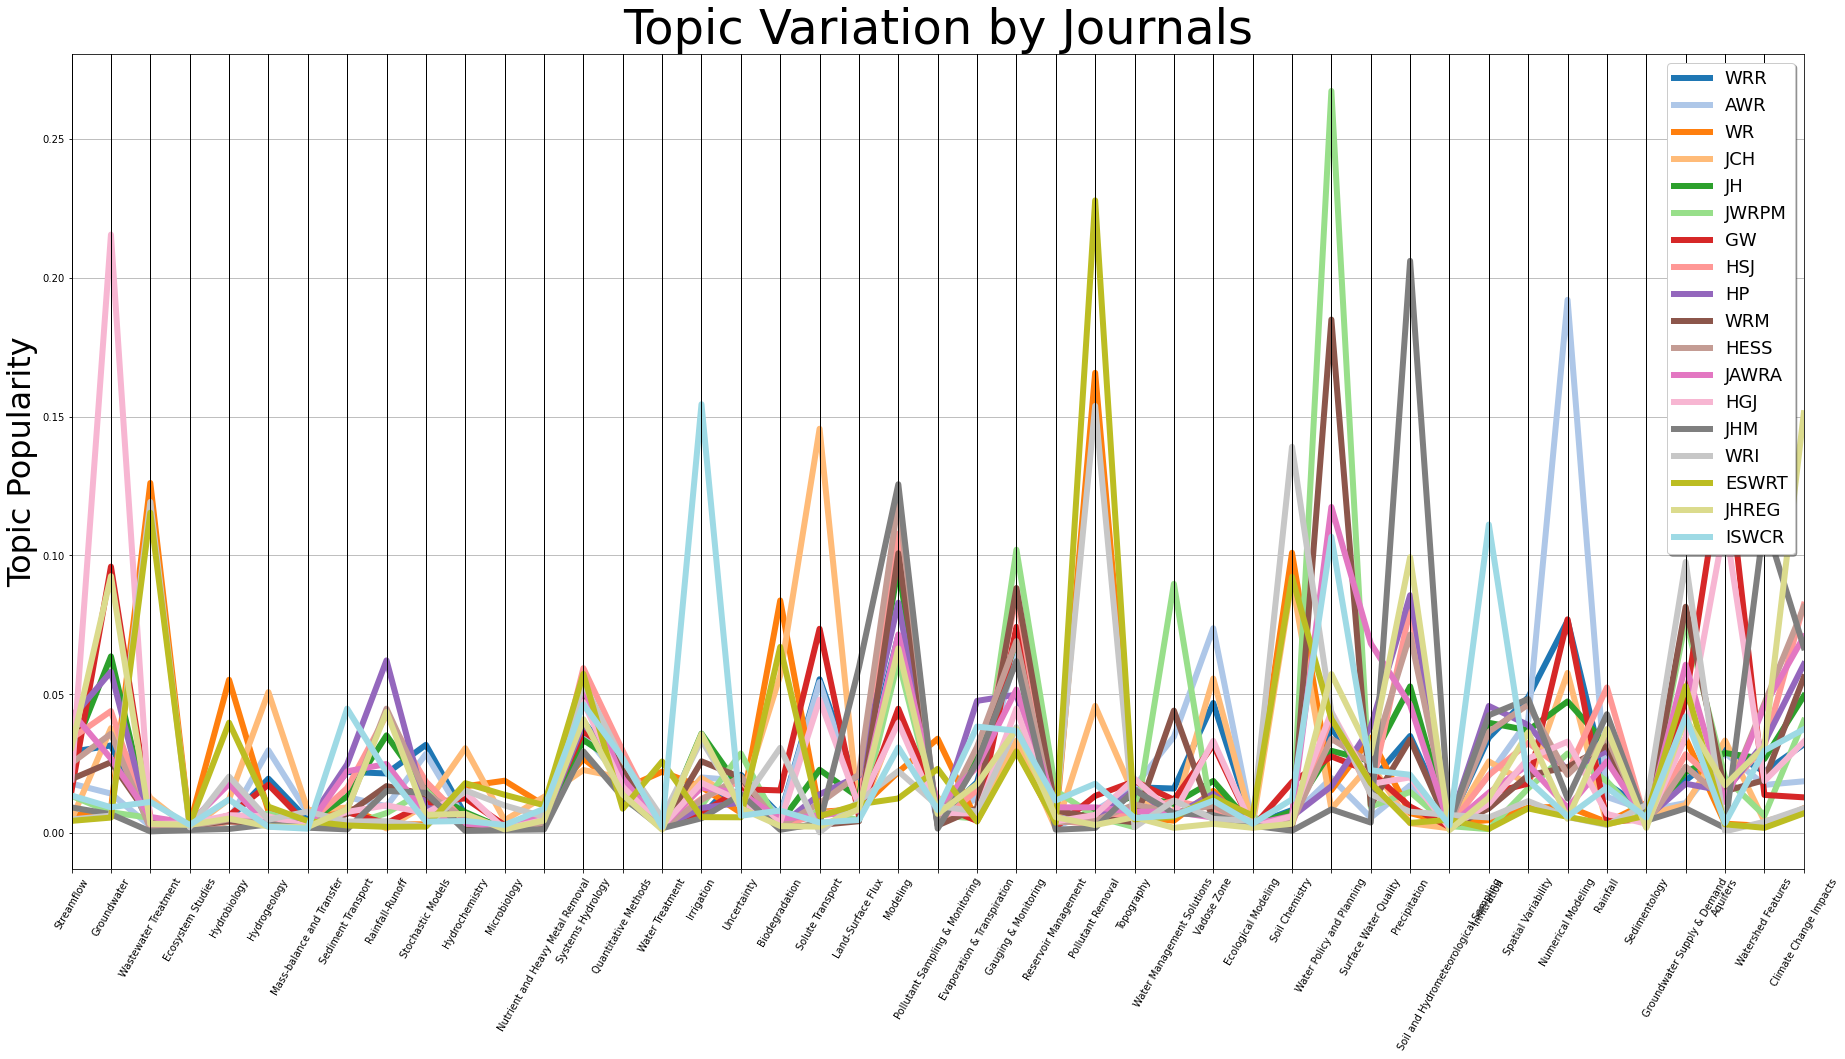

In [88]:
#parallel coordinates plot

#create dataframe of index, columns and data
plotdata = journal_topic_popularity #* np.expand_dims(journal_papers,-1)
df_plotdata = pd.DataFrame(index = journals, columns = topic_names, data = plotdata)
df_plotdata.index.name = "journals"
df_plotdata = df_plotdata.reset_index()

#plot figure
fig = plt.figure(figsize=(42,15))
gs = fig.add_gridspec(1,4)
ax = fig.add_subplot(gs[0, :3])

# set color cycle
colordexes = np.linspace(0,19,len(journals)).astype(int)
colors = list(plt.cm.tab20(np.arange(20)))
colors = [colors[i] for i in colordexes]
ax.set_prop_cycle('color', colors)

#define axes to plot without legend
pd.plotting.parallel_coordinates(df_plotdata, "journals", ax = ax, color = colors,
                                axvlines = 'Yes', linewidth = 6)
ax.get_legend().remove()
ax.set_title('Topic Variation by Journals', fontsize = 48)
ax.set_ylabel('Topic Popularity', fontsize = 32)
ax.tick_params(rotation=60, axis = 'x')
ax.legend(journals, loc='upper right', shadow=True, prop={'size': 18})


# plt.show()
# Save figure
plt.savefig('figures/parallel_coordinate_absolute_topics_broad.png')

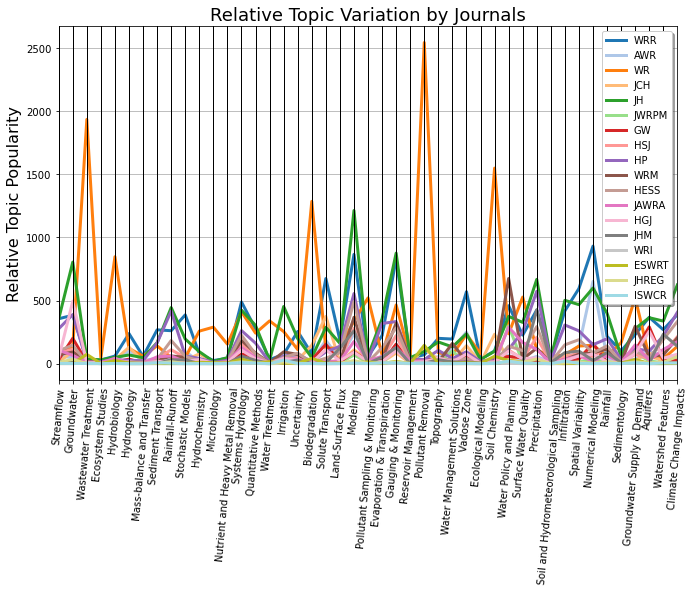

In [89]:
#Relative coordinates

#create dataframe of index, columns and data
plotdata = journal_topic_popularity * np.expand_dims(journal_papers,-1)
df_plotdata = pd.DataFrame(index = journals, columns = topic_names, data = plotdata)
df_plotdata.index.name = "journals"
df_plotdata = df_plotdata.reset_index()

#plot figure
fig = plt.figure(figsize=(15,6.5))
gs = fig.add_gridspec(1,4)
ax = fig.add_subplot(gs[0, :3])

# set color cycle
colordexes = np.linspace(0,19,len(journals)).astype(int)
colors = list(plt.cm.tab20(np.arange(20)))
colors = [colors[i] for i in colordexes]
ax.set_prop_cycle('color', colors)

#define axes to plot without legend
pd.plotting.parallel_coordinates(df_plotdata, "journals", ax = ax, color = colors,
                                axvlines = 'Yes', linewidth = 3)
ax.get_legend().remove()
ax.set_title('Relative Topic Variation by Journals', fontsize = 18)
ax.set_ylabel('Relative Topic Popularity', fontsize = 16)
ax.tick_params(rotation=85, axis = 'x')
ax.legend(journals, loc='upper right', shadow=True)


# plt.show()
# Save figure
plt.savefig('figures/parallel_coordinate_relative_topics_broad.png')

In [90]:
df_plotdata

,journals,Streamflow,Groundwater,Wastewater Treatment,Ecosystem Studies,Hydrobiology,Hydrogeology,Mass-balance and Transfer,Sediment Transport,Rainfall-Runoff,...,Soil and Hydrometeorological Sampling,Infiltration,Spatial Variability,Numerical Modeling,Rainfall,Sedimentology,Groundwater Supply & Demand,Aquifers,Watershed Features,Climate Change Impacts
0,WRR,356.025317,384.237822,34.752698,29.257887,60.797069,238.726657,58.185918,268.290092,261.453963,...,47.258650,418.549733,595.479562,930.921474,216.310292,101.663541,230.812880,367.644400,269.170406,389.088875
1,AWR,60.550546,48.349643,8.434170,8.313339,16.353164,101.287536,24.725500,44.179448,32.786219,...,10.674848,70.494201,138.016874,652.062570,44.180124,27.635259,36.797261,97.956999,58.953374,63.348765
2,WR,93.599413,130.186130,1933.932194,45.677066,847.014863,121.175602,60.823752,141.890590,48.850667,...,53.984416,71.522806,140.039479,146.721070,60.194100,166.446228,523.541099,52.190444,39.456397,137.335094
3,JCH,12.494428,97.070972,32.589901,3.923562,31.277189,130.407055,21.184760,23.609651,4.306753,...,4.427767,66.329358,45.235950,148.155393,7.891854,17.102500,26.028051,85.655766,10.911116,20.155331
4,JH,354.135876,804.351500,37.799538,30.943700,50.773493,69.175092,47.821249,166.837214,444.729688,...,38.547717,501.974447,467.626590,599.100210,399.337176,58.408528,277.821449,364.513088,337.740802,623.958651
5,JWRPM,15.044083,8.427841,6.130092,3.752822,4.824480,7.967667,3.220997,2.996007,8.093414,...,2.847020,1.583959,18.118315,32.183228,20.950220,4.185922,86.255247,22.465295,7.115785,45.426465
6,GW,31.981747,200.894275,11.866050,5.433235,13.349090,36.475939,6.109548,15.752710,7.389519,...,4.587167,29.901363,37.303709,161.151332,8.761057,10.393052,100.254883,292.124606,28.766541,26.957798
7,HSJ,88.607832,114.196630,4.562958,4.237257,10.737404,8.000506,9.030642,42.159415,110.754643,...,6.593923,54.244629,84.511495,56.799965,136.285124,9.515062,73.770923,40.100409,81.180039,213.645504
8,HP,276.910853,389.161301,16.865846,17.407503,30.545426,27.399643,23.751849,166.034850,416.404697,...,22.925570,306.582970,260.429917,150.613569,198.209940,35.478740,119.049673,101.281711,218.409670,406.943492
9,WRM,70.997141,93.104113,19.100178,9.298335,15.762404,11.852076,10.981266,25.135971,61.761759,...,7.098904,32.460509,75.853334,86.623880,114.932258,8.270491,297.312809,55.079158,69.604842,204.552554


In [91]:
journal_papers

array([12170.,  3395., 15336.,  2568., 12636.,  1123.,  2093.,  2598.,
        6694.,  3647.,  4106.,  2461.,  2298.,  2072.,    76.,   641.,
         376.,   189.])

# Journal Uniqueness

In [92]:
def calc_KL_divergence(pmf1,pmf2):
    div = pmf1 * np.log(pmf2/pmf1)
#     div[pmf1 == 0] = 0
#     div[pmf2 == 0] = 0
    return -np.nansum(div)

In [93]:
def jensen_shannon_divergence(pmf1,pmf2):
    M=0.5*(pmf1+pmf2)
    D1=calc_KL_divergence(pmf1,M)
    D2=calc_KL_divergence(pmf2,M)
    JSDiv = 0.5*D1+0.5*D2
    return JSDiv

In [94]:
def jensen_shannon_distance(pmf1,pmf2):
    M=0.5*(pmf1+pmf2)
    D1=calc_KL_divergence(pmf1,M)
    D2=calc_KL_divergence(pmf2,M)
    JSDiv = 0.5*D1+0.5*D2
    JSD = np.sqrt(JSDiv)
    return JSD

In [95]:
# calculate JSD 
JSD_journals = np.full([len(journals), len(years)], np.nan)
for y, year in enumerate(years):
    for j, journal in enumerate(journals):
        JSD_journals[j,y] = jensen_shannon_distance(journal_year_topic_popularity[j,y,:],
                                                     topic_popularity[y,:])

In [96]:
# calculate KLD 
# KLD_journals = np.full([len(journals), len(years)], np.nan)
# for y, year in enumerate(years):
#     for j, journal in enumerate(journals):
#         KLD_journals[j,y] = calc_KL_divergence(journal_year_topic_popularity[j,y,:],
#                                                      topic_popularity[y,:])

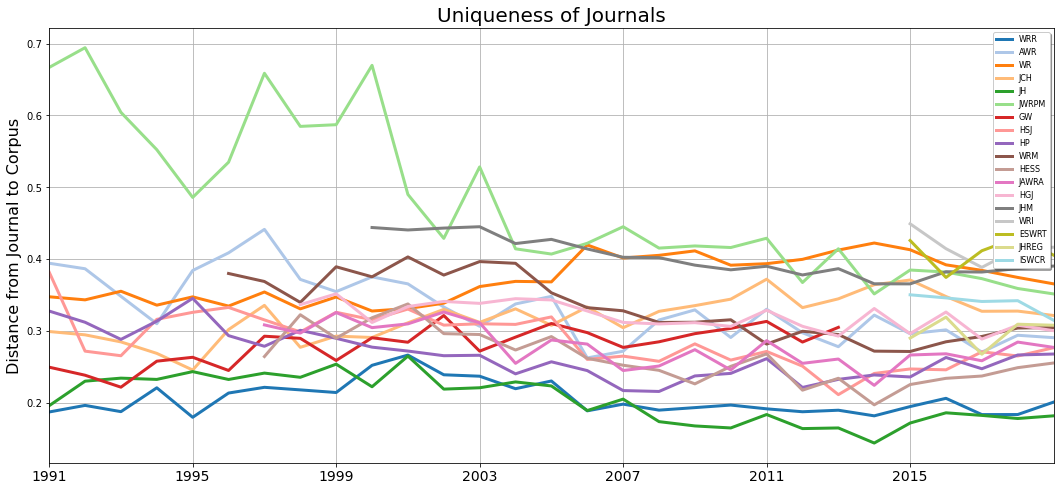

In [97]:
fig, ax = plt.subplots(1,1,figsize=(18,8))

# set color cycle
colordexes = np.linspace(0,19,len(journals)).astype(int)
colors = list(plt.cm.tab20(np.arange(20)))
colors = [colors[i] for i in colordexes]

plotdata = JSD_journals.transpose()
plotdata[plotdata==0] = np.nan

ax.set_prop_cycle('color', colors)
ax.plot(years, plotdata, lw=3)

# aesthetics
ax.legend(journals, shadow=True, loc=1, prop={'size': 8})
ax.set_title(f'Uniqueness of Journals', fontsize=20)
ax.set_ylabel('Distance from Journal to Corpus', fontsize=16)
ax.set_xticks(years[np.floor(np.linspace(0,len(years)-1,8)).astype(int)])
ax.set_xticklabels(years[np.floor(np.linspace(0,len(years)-1,8)).astype(int)], fontsize=14)
ax.set_xlim([0,years[-2]])
plt.grid()

# Save figure
plt.savefig('figures/journal_uniqueness_broad.png')

# Journal Diversity

In [98]:
# calculate JSD 
JSD_across_journals = np.full([len(journals), len(journals), len(years)], np.nan)
for y, year in enumerate(years):
    for j1, journal1 in enumerate(journals):
        for j2, journal2 in enumerate(journals):
            JSD_across_journals[j1,j2,y] = jensen_shannon_distance(journal_year_topic_popularity[j1,y,:],
                                                                   journal_year_topic_popularity[j2,y,:])

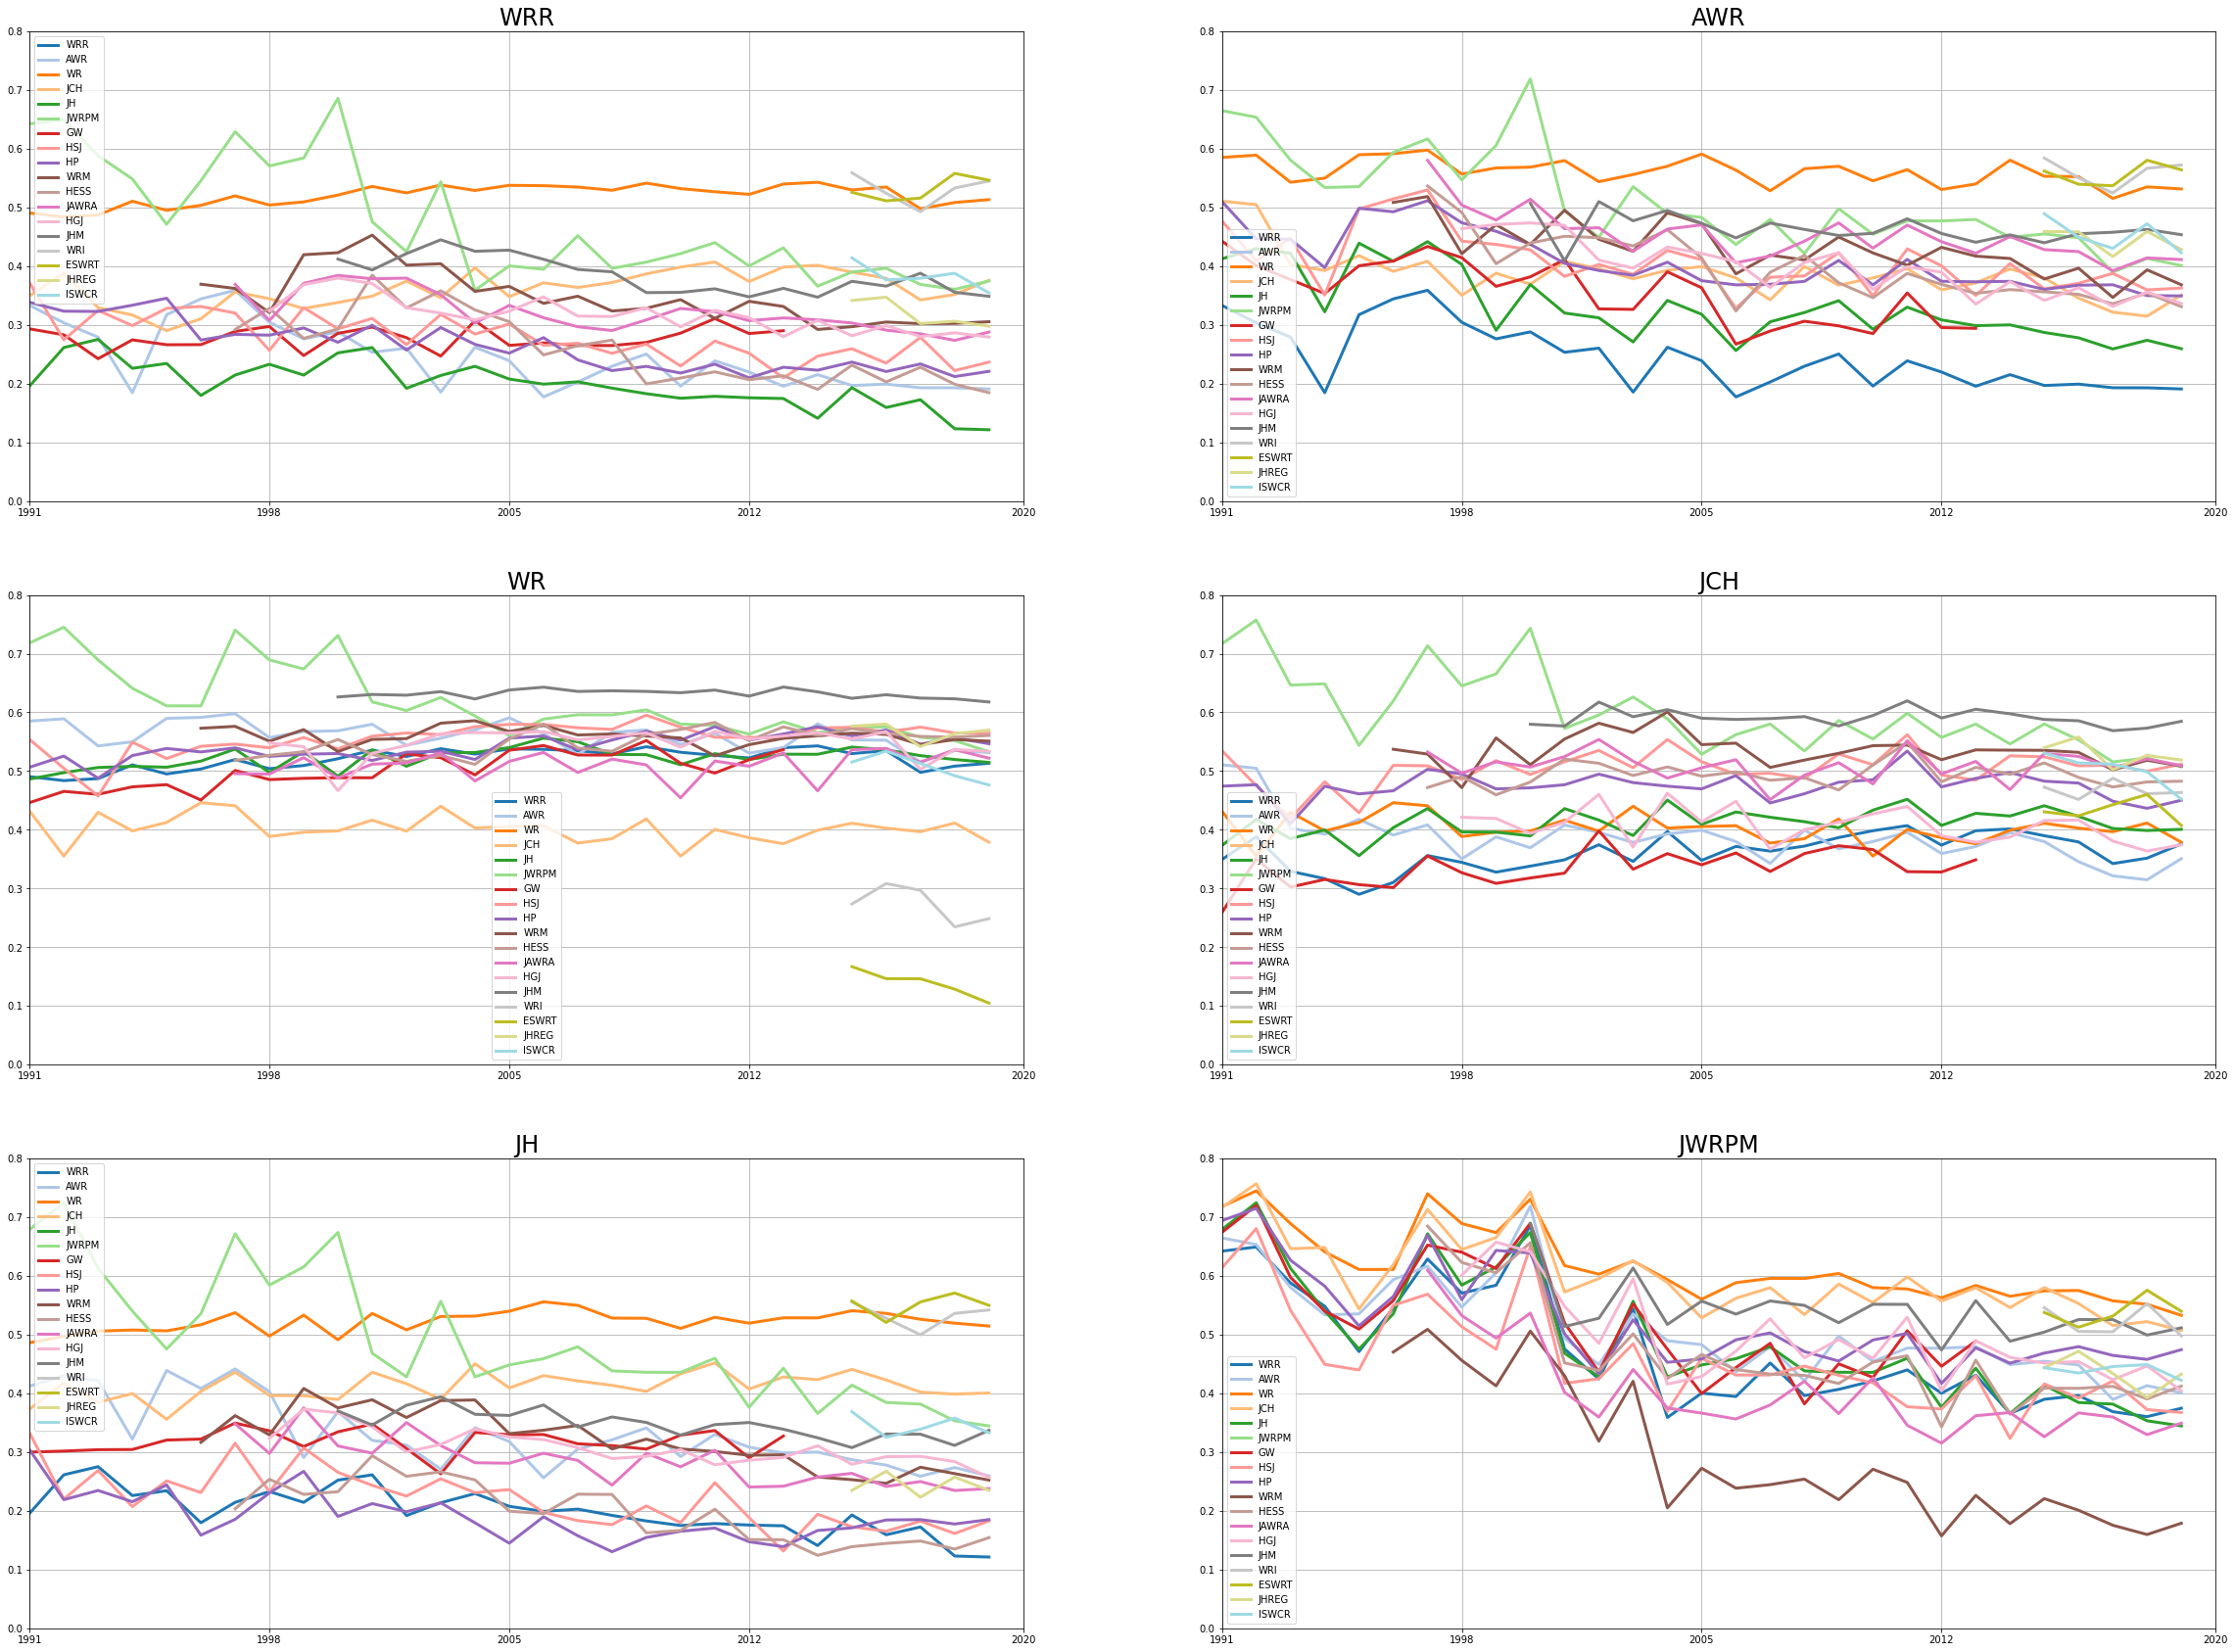

In [99]:
# plot JSD for each journal 
fig, axes = plt.subplots(3,2,figsize=(40,30))

# set color cycle
colordexes = np.linspace(0,19,len(journals)).astype(int)
colors = list(plt.cm.tab20(np.arange(20)))
colors = [colors[i] for i in colordexes]

for i, ax in enumerate(axes.flatten()):
    if i < len(journals):
        ax.set_prop_cycle('color', colors)
        plotdata = JSD_across_journals[i,:,:].transpose()
        plotdata[plotdata==0] = np.nan
        ax.plot(np.sort(years), JSD_across_journals[i,:,:].transpose(), linewidth=3)
        ax.set_title(journals[i], fontsize=24)
        ax.set_ylim([0.0, 0.8])
        ax.set_xlim([0, 27])
        ax.set_xticks(np.floor(np.linspace(0,len(years)-1,5)))
        ax.legend(journals)
        ax.grid() 
        
# Save figure
plt.savefig('figures/journal_time_jsd_broad.png')

In [100]:
#calculate JSD over whole corpus
JSD_corpus = np.full([len(journals), len(journals)], np.nan)
for j1, journal1 in enumerate(journals):
    for j2, journal2 in enumerate(journals):
        JSD_corpus[j1,j2] = jensen_shannon_distance(journal_year_topic_popularity[j1,:],
                                                    journal_year_topic_popularity[j2,:])

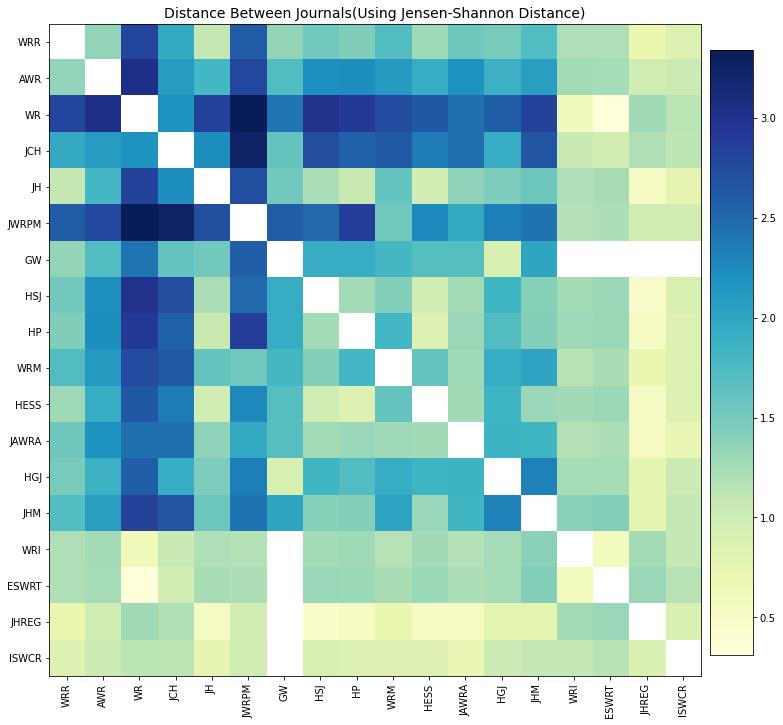

In [101]:
#plot single confusion matrix for JSD

fig, ax = plt.subplots(1,1, figsize=(12,12))

plot_data = JSD_corpus
plot_data[plot_data == 0] = np.nan
conf_arr_corpus = np.array(plot_data)    
res = ax.imshow(np.array(conf_arr_corpus), cmap="YlGnBu", interpolation='nearest')
width = len(journals)
height = len(journals)
ax.set_xticks(range(width))
ax.set_yticks(range(height))
ax.set_xticklabels(journals, rotation=90)
ax.set_yticklabels(journals)
ax.set_title('Distance Between Journals(Using Jensen-Shannon Distance)', fontsize=14)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(res, cax=cbar_ax)

# Save figure
plt.savefig('figures/journal_jsd_broad.png')

In [102]:
#calculate KLD over whole corpus
KLD_corpus = np.full([len(journals), len(journals)], np.nan)
for j1, journal1 in enumerate(journals):
    for j2, journal2 in enumerate(journals):
        KLD_corpus[j1,j2] = calc_KL_divergence(journal_year_topic_popularity[j1,:],
                                                    journal_year_topic_popularity[j2,:])

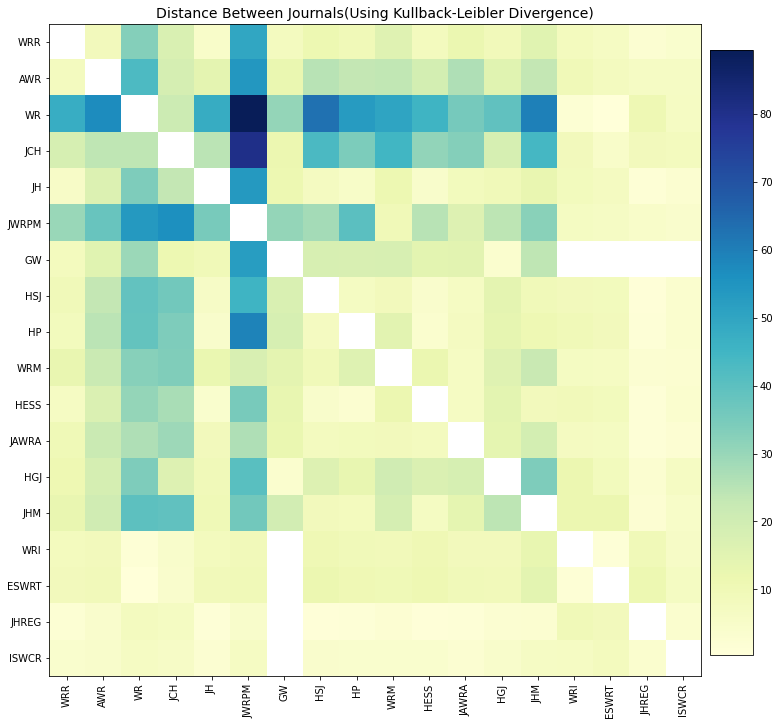

In [103]:
#plot single confusion matrix for KLD
fig, ax = plt.subplots(1,1, figsize=(12,12))

plot_data = KLD_corpus
plot_data[plot_data == 0] = np.nan
conf_arr_corpus = np.array(plot_data)    
res = ax.imshow(np.array(conf_arr_corpus), cmap="YlGnBu", interpolation='nearest')
width = len(journals)
height = len(journals)
ax.set_xticks(range(width))
ax.set_yticks(range(height))
ax.set_xticklabels(journals, rotation=90)
ax.set_yticklabels(journals)
ax.set_title('Distance Between Journals(Using Kullback-Leibler Divergence)', fontsize=14)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(res, cax=cbar_ax)

# Save figure
plt.savefig('figures/journal_kld_broad.png')

In [104]:
#calculate JSDiv over whole corpus
JSDiv_corpus = np.full([len(journals), len(journals)], np.nan)
for j1, journal1 in enumerate(journals):
    for j2, journal2 in enumerate(journals):
        JSDiv_corpus[j1,j2] = jensen_shannon_divergence(journal_year_topic_popularity[j1,:],
                                                    journal_year_topic_popularity[j2,:])

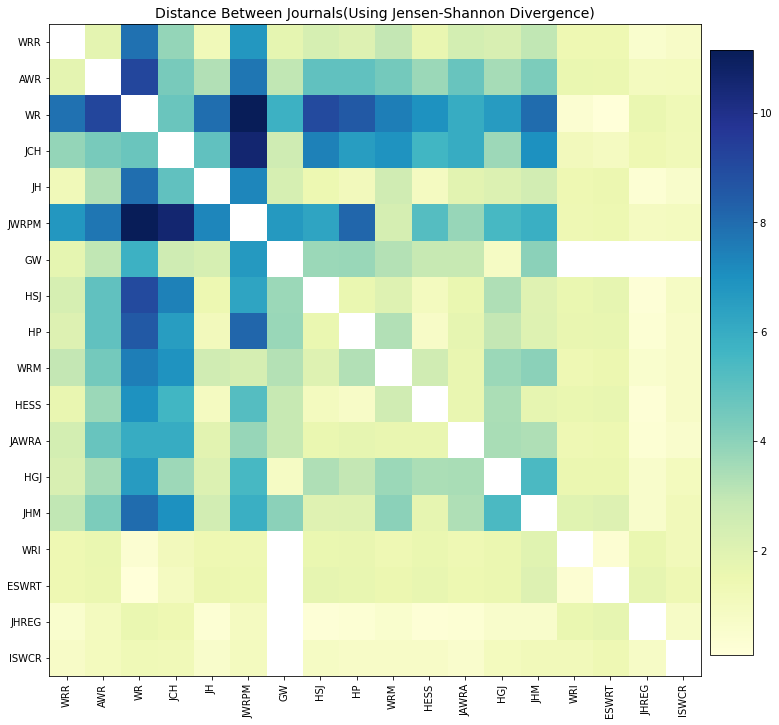

In [105]:
#plot single confusion matrix for JSDiv

fig, ax = plt.subplots(1,1, figsize=(12,12))

plot_data = JSDiv_corpus
plot_data[plot_data == 0] = np.nan
conf_arr_corpus = np.array(plot_data)    
res = ax.imshow(np.array(conf_arr_corpus), cmap="YlGnBu", interpolation='nearest')
width = len(journals)
height = len(journals)
ax.set_xticks(range(width))
ax.set_yticks(range(height))
ax.set_xticklabels(journals, rotation=90)
ax.set_yticklabels(journals)
ax.set_title('Distance Between Journals(Using Jensen-Shannon Divergence)', fontsize=14)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(res, cax=cbar_ax)

# Save figure
plt.savefig('figures/journal_jsdiv_broad.png')